# Python wrapper for ImageJ

[```imagej.py```](https://github.com/imagej/imagej.py) provides a set of wrapper functions for integration between ImageJ and Python.

It also provides a high-level entry point ```imagej.IJ``` for invoking [ImageJ Server](https://github.com/imagej/imagej-server) APIs.

## Requirements

```imglyb```

Install imglyb using ```conda install -c hanslovsky imglyb```. 

Further infromation regarding imglyb can be found in the [imglyb GitHub repository](https://github.com/imglib/imglyb).

## Before we really get started, let's define a helpful utility function, show()...

In [1]:
from matplotlib import pyplot as plt
def show(image):
    plt.imshow(image, interpolation='nearest')
    plt.show()

*NOTE: Make sure to replace  ``` /Applications/Fiji.app ``` with the location of your Fiji installation.*

## Spin up ImageJ

In [2]:
import imagej
ij = imagej.init('/Applications/Fiji.app')

Added 440 JARs to the Java classpath.


## Import an image with scikit-image.

In [3]:
import skimage
from skimage import io
img = io.imread("http://imagej.net/images/boats.gif")

## Show the image

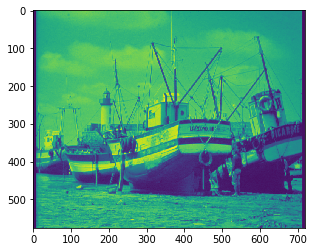

In [4]:
show(img)

## Invoke ImageJ's Gaussian Op

**Note:*** You cannot show variables returned by calls to ```ij.op().run``` and friends. You'll have to pass them as outputs to computers.

This is because the object that comes back is an ImgLib2 object, but ```show``` will only work on numpy objects.

There is a ```gauss``` that takes the output as a parameter, so we'll pass it via ```p2j(gauss)``` after allocating ```gauss``` using ```numpy.zeros```.

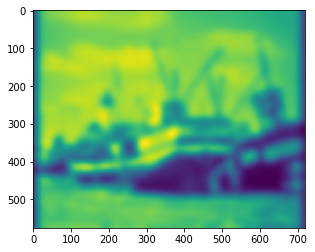

In [5]:
import imglyb
import numpy as np
from imglyb import to_imglib as p2j
gauss = np.zeros(img.shape, dtype=img.dtype)
ij.op().filter().gauss(p2j(gauss),p2j(img), 10)
show(gauss)

You can always look up more info on the specific Op by calling:

In [6]:
ij.op().help("gauss")

'Available operations:\n\t(RandomAccessibleInterval out) =\n\tnet.imagej.ops.filter.gauss.DefaultGaussRA(\n\t\tRandomAccessibleInterval out,\n\t\tRandomAccessible in,\n\t\tdouble[] sigmas)\n\t(RandomAccessibleInterval out?) =\n\tnet.imagej.ops.filter.gauss.GaussRAISingleSigma(\n\t\tRandomAccessibleInterval out?,\n\t\tRandomAccessibleInterval in,\n\t\tdouble sigma,\n\t\tOutOfBoundsFactory outOfBounds?)\n\t(RandomAccessibleInterval out?) =\n\tnet.imagej.ops.filter.gauss.DefaultGaussRAI(\n\t\tRandomAccessibleInterval out?,\n\t\tRandomAccessibleInterval in,\n\t\tdouble[] sigmas,\n\t\tOutOfBoundsFactory outOfBounds?)'

## Invoke ImageJ's Frangi vesselness op.

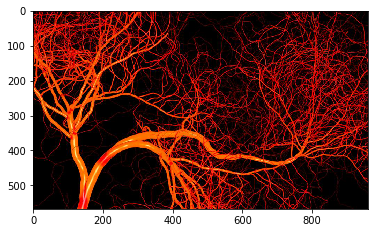

In [7]:
import skimage
from skimage import io
# NB: Blood vessel image from: https://www.fi.edu/heart/blood-vessels
img = io.imread('https://www.fi.edu/sites/fi.live.franklinds.webair.com/files/styles/featured_large/public/General_EduRes_Heart_BloodVessels_0.jpg')
show(img)

Average out RGB channels, converting to grayscale.

In [8]:
img = np.mean(img, axis=2)

Want to learn more about a specific Python goodie?  Just call:

In [9]:
help(np.mean)

Help on function mean in module numpy.core.fromnumeric:

mean(a, axis=None, dtype=None, out=None, keepdims=<no value>)
    Compute the arithmetic mean along the specified axis.
    
    Returns the average of the array elements.  The average is taken over
    the flattened array by default, otherwise over the specified axis.
    `float64` intermediate and return values are used for integer inputs.
    
    Parameters
    ----------
    a : array_like
        Array containing numbers whose mean is desired. If `a` is not an
        array, a conversion is attempted.
    axis : None or int or tuple of ints, optional
        Axis or axes along which the means are computed. The default is to
        compute the mean of the flattened array.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a mean is performed over multiple axes,
        instead of a single axis or all the axes as before.
    dtype : data-type, optional
        Type to use in computing the mean.  Fo

Now invoke the Frangi Vesselness Op... again, we are passing it via ```p2j(gauss)``` after allocating ```gauss``` using ```numpy.zeros```.

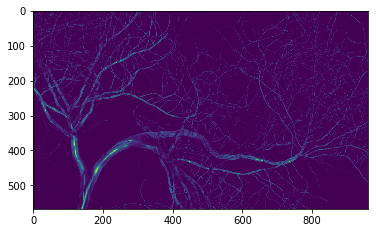

In [10]:
vessels = np.zeros(img.shape, dtype=img.dtype)
ij.op().filter().frangiVesselness(p2j(vessels), p2j(img), [1, 1], 20)
show(vessels)

You can always look up more info on the specific Op by calling:

In [11]:
ij.op().help("frangiVesselness")

'Available operations:\n\t(RandomAccessibleInterval out) =\n\tnet.imagej.ops.filter.vesselness.DefaultFrangi(\n\t\tRandomAccessibleInterval out,\n\t\tRandomAccessibleInterval in,\n\t\tdouble[] spacing,\n\t\tint scale)'

## Invoke some cool ImageJ Math

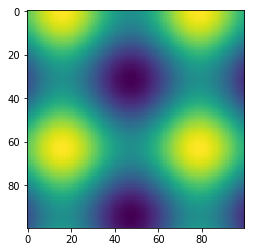

In [12]:
from jnius import autoclass
Views = autoclass('net.imglib2.view.Views')

generated = np.zeros((100, 100))
iterable = Views.iterable(imglyb.to_imglib(generated))
ij.op().image().equation(iterable, "64 * (Math.sin(0.1 * p[0]) + Math.cos(0.1 * p[1])) + 128")
show(generated)

You can always look up more info on the specific Op by calling:

In [13]:
ij.op().help("equation")

'Available operations:\n\t(IterableInterval out?) =\n\tnet.imagej.ops.image.equation.DefaultEquation(\n\t\tIterableInterval out?,\n\t\tString in)'